In [51]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from implementations import *
from evaluation import *
import datetime
from collections import Counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [52]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)

## Plot regularized logistic regression using gradient descent

In [ ]:
# Parameters
poly_degree = 10
max_iter = [1000]
gammas = [0.01]
poly_degrees = [10]

lambdas = [0.01, 0.1, 1, 10, 100]
evaluation_data_reg_log_reg = []

for max_iter in max_iters:
    for gamma in gammas:
        for lambda_ in lambdas:
            for poly_degree in poly_degrees:
                initial_w = np.array(np.zeros(30*poly_degree+1))

                evaluation_result = cross_val(tX, y, False, 10, poly_degree, reg_logistic_regression, max_iters=max_iter, gamma=gamma, initial_w=initial_w, lambda_=lambda_)

                evaluation_data_reg_log_reg.append(evaluation_result)
                #print(evaluation_result)

In [122]:
import pickle
serialization_file = "evaluation/reg_logistic_regression_eval_201015_22h30_Adr.p"

In [80]:
filehandler = open(serialization_file, 'wb')
pickle.dump(evaluation_data_reg_log_reg, filehandler)

In [124]:
evaluation_data_reg_log_reg = pickle.load(open(serialization_file, "rb"))
print(len(eval))

5


In [125]:
print(evaluation_data_reg_log_reg)

[{'method': 'reg_logistic_regression', 'poly_degree': 10, 'parameters': {'max_iters': 10, 'gamma': 0.01, 'initial_w': array([ 1.11640401e+03, -1.14975638e+03, -1.74084762e+02,  1.36837010e+02,
       -1.93698304e+02,  5.33641786e+02, -8.50877003e+01,  1.62784691e+03,
       -1.84629345e+02,  8.02923798e+01, -6.04298796e+02, -3.19840094e+02,
        2.15857783e+02,  1.12967521e+03, -6.01334709e+01,  3.08133227e+00,
        5.62311738e+02, -8.10882087e+00,  2.09419474e+01, -1.31100025e+02,
        8.47251338e+00,  8.58801256e+01,  2.86938702e+01,  4.11205528e+01,
        4.18580913e+00, -1.67603981e+01,  5.61499413e+01, -1.20075905e+01,
       -1.85743998e+01, -2.91560930e+02, -9.87736254e+02,  1.55975441e+02,
       -1.36314560e+03,  5.15998507e+02,  8.44112257e+01,  6.86734361e+02,
        1.34007324e+02,  7.24169800e+02, -9.29471091e+01, -3.77111165e+02,
       -1.10265680e+02,  5.53943000e+02,  2.50809109e+02, -1.15834783e+02,
       -1.22229316e+02, -2.12799228e+01,  9.42900960e+01,

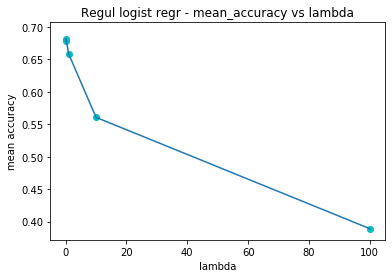

In [127]:
gamma = []
max_iters = []
lambdas = []
best_mean_accuracy = 0

eval = evaluation_data_reg_log_reg

for item in eval:
    #print("\n---\n")
    param = item['parameters']
    #print("item = ", item)
    gamma.append(param['gamma'])
    max_iters.append(param['max_iters'])
    #print("param = ", param)
    #for key, param_item in param.items():
        #print("key = ", key, "param_item = ",param_item)
    lambdas.append(param['lambda_'])
    #print(item['mean_accuracy'])
        
    best_mean_accuracy = max(item['mean_accuracy'], best_mean_accuracy)
    
gamma_uniq = np.unique(gamma)
max_iters_uniq = np.unique(max_iters)
lambda_unique = np.unique(lambdas)

#print(gamma_uniq)
#print(max_iters_uniq)
#print(lambda_unique)
best_max_iters = 0
best_gamma = 0
best_degree = 0
best_lambda = 0

for item in eval:
    param = item['parameters']
    
    if best_mean_accuracy == item['mean_accuracy']:
        best_max_iters = param['max_iters']
        best_gamma = param['gamma']
        best_degree = item['poly_degree']
        best_lambda = param['lambda_']
        item['method']

#print(best_mean_accuracy)        
#print(best_max_iters)
#print(best_gamma)
#print(best_degree)
#print(best_lambda)

accuracies = []
iterations = []

for item in eval:
    param = item['parameters']
    
    accuracies.append(item['mean_accuracy'])
    iterations.append(param['max_iters'])
    plt.scatter(param['lambda_'], item['mean_accuracy'], color ='c')

title = 'Regul logist regr - mean_accuracy vs lambda'
plt.title(title)        
directory = 'plots\\'
plt.plot(lambdas,accuracies)
plt.xlabel('lambda')
plt.ylabel('mean accuracy')
plt.savefig(directory + title + '.jpg')
plt.show()
